✅ Datos cargados: 802 filas y 26 columnas.

🔍 --- 1. DATOS FALTANTES ---


C:\Users\pedro\AppData\Local\Temp\ipykernel_46460\2178124023.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_percent.index, y=missing_percent.values, palette="Reds_r")


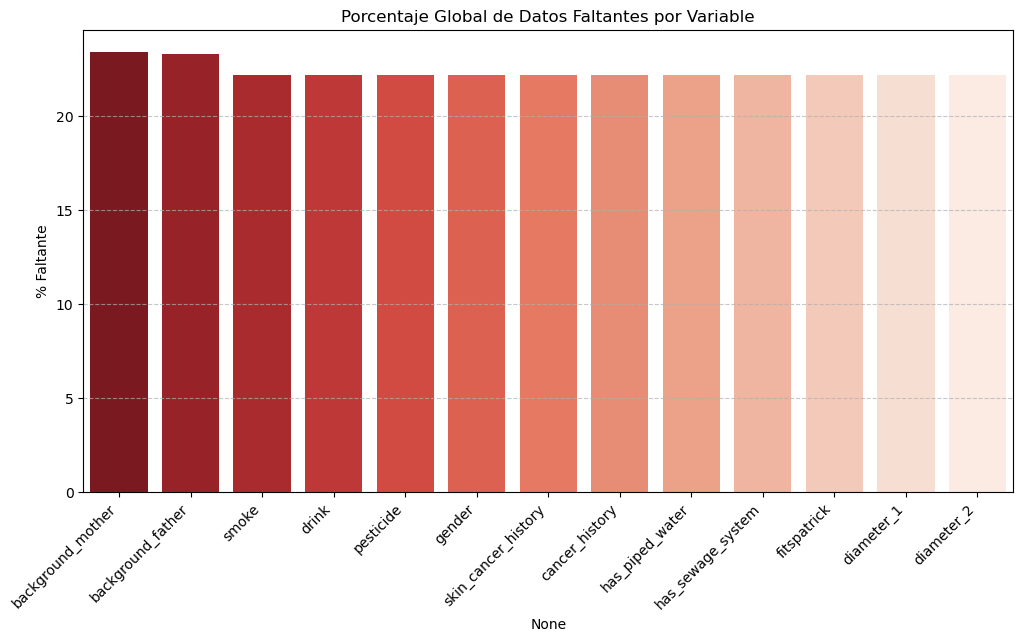

Top 5 variables con más nulos (Global):
background_mother    23.441397
background_father    23.316708
smoke                22.194514
drink                22.194514
pesticide            22.194514
dtype: float64

🔍 --- 1.2 DATOS FALTANTES POR CLASE (Diagnostic) ---


C:\Users\pedro\AppData\Local\Temp\ipykernel_46460\2178124023.py:49: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_class = df.groupby('diagnostic').apply(lambda x: x.isnull().mean() * 100)


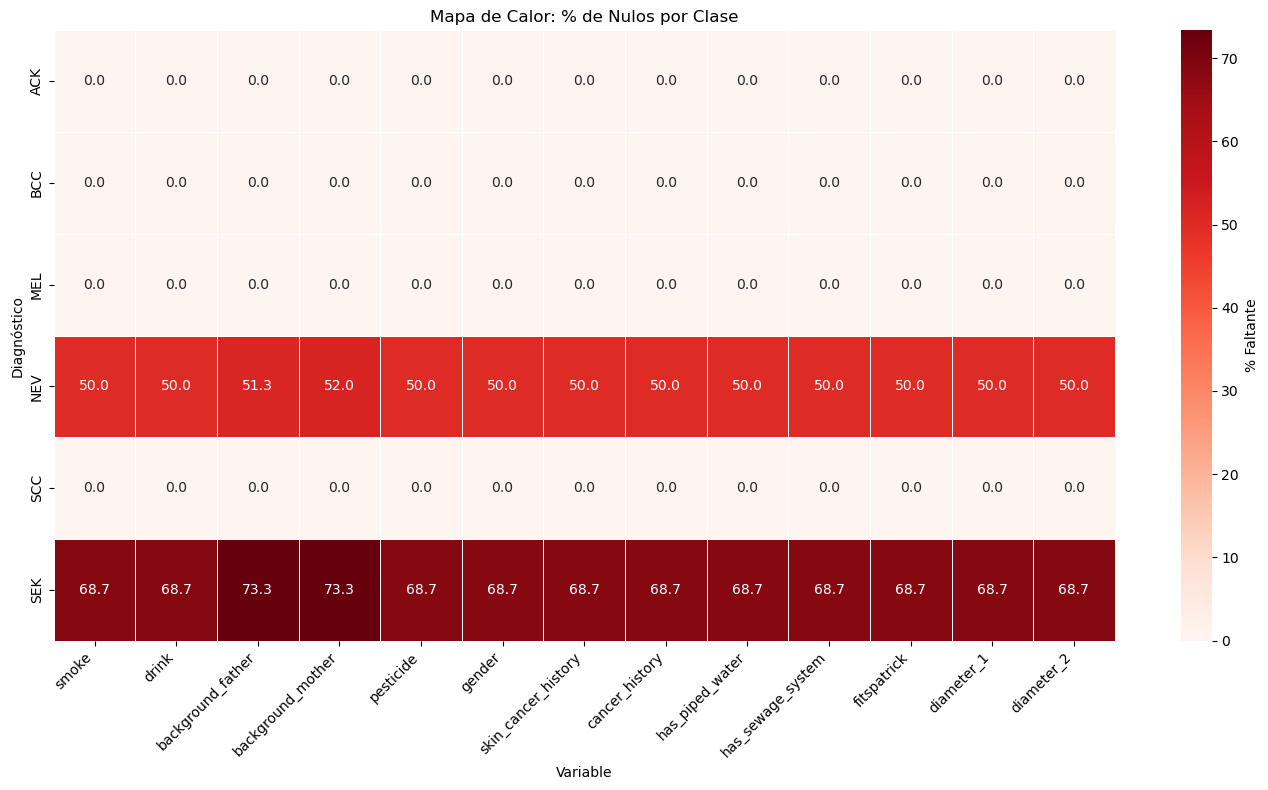


📊 --- 2. DISTRIBUCIONES ---


C:\Users\pedro\AppData\Local\Temp\ipykernel_46460\2178124023.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='diagnostic', ax=axes[0, 0], palette='viridis',
C:\Users\pedro\AppData\Local\Temp\ipykernel_46460\2178124023.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', ax=axes[1, 0], palette='pastel')
C:\Users\pedro\AppData\Local\Temp\ipykernel_46460\2178124023.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col_region, ax=axes[1, 1], palette='magma',


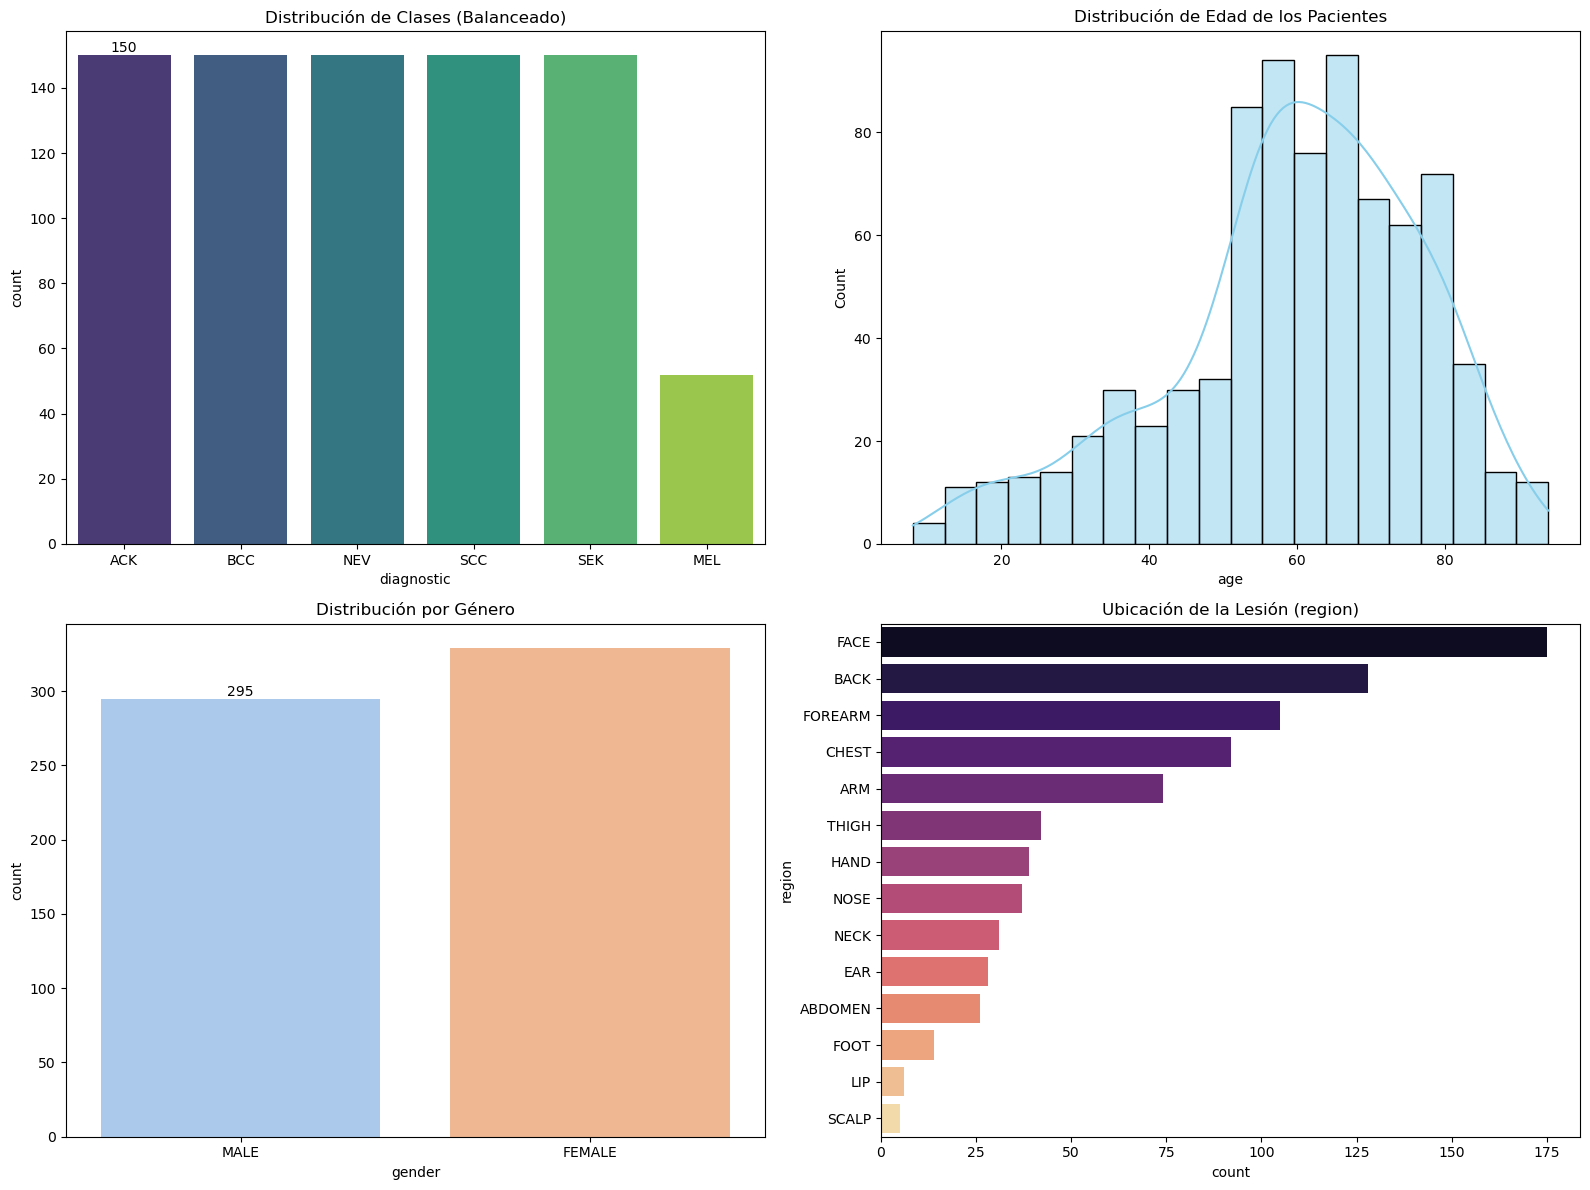


📸 --- 3. EJEMPLOS VISUALES POR CLASE ---


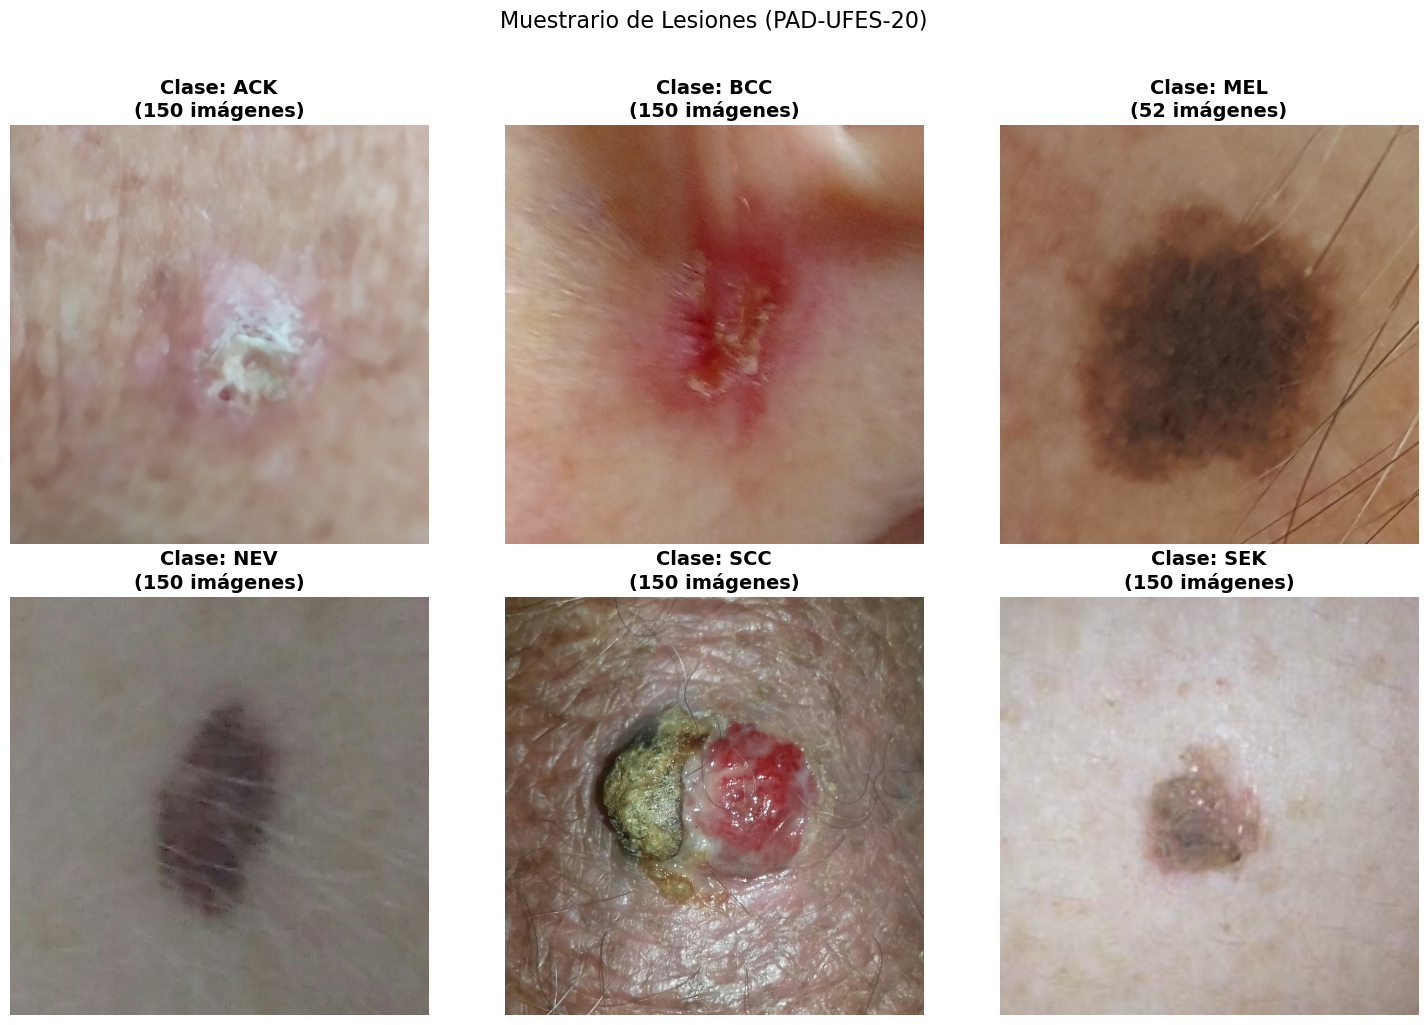

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
import numpy as np

# --- CONFIGURACIÓN ---
csv_path = 'Datos/metadata.csv'
images_root = 'Datos/images'

# Cargamos datos
try:
    df = pd.read_csv(csv_path)
    print(f"✅ Datos cargados: {len(df)} filas y {len(df.columns)} columnas.")
except FileNotFoundError:
    print("❌ Error: No encuentro el archivo. Asegúrate de haber ejecutado el paso anterior.")
    raise

# ==========================================
# 1. ANÁLISIS DE DATOS FALTANTES (MISSING)
# ==========================================
print("\n🔍 --- 1. DATOS FALTANTES ---")

# 1.1 GLOBAL
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100

if not missing.empty:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=missing_percent.index, y=missing_percent.values, palette="Reds_r")
    plt.title("Porcentaje Global de Datos Faltantes por Variable")
    plt.ylabel("% Faltante")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    
    print("Top 5 variables con más nulos (Global):")
    print(missing_percent.head(5))
else:
    print("✨ ¡Increíble! No hay datos faltantes en este dataset.")

# 1.2 POR CLASE (NUEVO)
print("\n🔍 --- 1.2 DATOS FALTANTES POR CLASE (Diagnostic) ---")

# Calculamos el % de nulos agrupando por diagnóstico
# (Esto crea una tabla donde filas=diagnóstico, columnas=variables)
missing_by_class = df.groupby('diagnostic').apply(lambda x: x.isnull().mean() * 100)

# Filtramos: Solo mostramos columnas que tengan ALGÚN nulo (para no llenar el gráfico de ceros)
cols_with_missing = missing_by_class.columns[missing_by_class.sum() > 0]
missing_by_class = missing_by_class[cols_with_missing]

if not missing_by_class.empty:
    plt.figure(figsize=(14, 8))
    # Usamos un Heatmap: Rojo oscuro = Faltan muchos datos
    sns.heatmap(missing_by_class, annot=True, cmap='Reds', fmt='.1f', linewidths=.5, cbar_kws={'label': '% Faltante'})
    plt.title('Mapa de Calor: % de Nulos por Clase')
    plt.ylabel('Diagnóstico')
    plt.xlabel('Variable')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No hay nulos diferenciales por clase.")


# ==========================================
# 2. DISTRIBUCIONES (EDA)
# ==========================================
print("\n📊 --- 2. DISTRIBUCIONES ---")

# Configuración de gráficos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# A) Distribución de Diagnósticos (Target)
sns.countplot(data=df, x='diagnostic', ax=axes[0, 0], palette='viridis', 
              order=df['diagnostic'].value_counts().index)
axes[0, 0].set_title('Distribución de Clases (Balanceado)')
axes[0, 0].bar_label(axes[0, 0].containers[0])

# B) Distribución de Edad
sns.histplot(data=df, x='age', kde=True, ax=axes[0, 1], color='skyblue', bins=20)
axes[0, 1].set_title('Distribución de Edad de los Pacientes')

# C) Distribución por Género
sns.countplot(data=df, x='gender', ax=axes[1, 0], palette='pastel')
axes[1, 0].set_title('Distribución por Género')
axes[1, 0].bar_label(axes[1, 0].containers[0])

# D) Ubicación en el cuerpo
col_region = next((c for c in ['region', 'location', 'anatom_site_general'] if c in df.columns), None)
if col_region:
    sns.countplot(data=df, y=col_region, ax=axes[1, 1], palette='magma', 
                  order=df[col_region].value_counts().index)
    axes[1, 1].set_title(f'Ubicación de la Lesión ({col_region})')
else:
    axes[1, 1].text(0.5, 0.5, "No se encontró columna de Región", ha='center')

plt.tight_layout()
plt.show()

# ==========================================
# 3. VISUALIZACIÓN DE IMÁGENES (GRID)
# ==========================================
print("\n📸 --- 3. EJEMPLOS VISUALES POR CLASE ---")

# Obtenemos las clases únicas
clases = sorted(df['diagnostic'].unique())

# Preparamos el grid
n_cols = 3
n_rows = int(np.ceil(len(clases) / n_cols))
plt.figure(figsize=(15, 5 * n_rows))

for i, clase in enumerate(clases):
    # Buscamos la carpeta de la clase
    folder_path = os.path.join(images_root, clase)
    
    if os.path.exists(folder_path):
        # Cogemos la primera imagen que pillemos
        images = [f for f in os.listdir(folder_path) if f.endswith('.png')]
        
        if images:
            img_name = images[0]
            img_path = os.path.join(folder_path, img_name)
            
            # Cargamos y mostramos
            try:
                img = Image.open(img_path)
                ax = plt.subplot(n_rows, n_cols, i + 1)
                ax.imshow(img)
                ax.set_title(f"Clase: {clase}\n({len(images)} imágenes)", fontsize=14, fontweight='bold')
                ax.axis('off')
            except Exception as e:
                print(f"Error al leer imagen de {clase}: {e}")
    else:
        print(f"⚠️ No encuentro la carpeta: {folder_path}")

plt.suptitle("Muestrario de Lesiones (PAD-UFES-20)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()